Sampler Primitive computes a quasi distribution of measurement outcomes. Since it deals with probability distribution, it measures the quantum operation and turns them into classical and gives the output as the probability.

For instance, take Bell states, phi+. In phi+ we have equal probability of getting 00 or 11 and so the sampler primitive gives us the distribution for both having equal chances. 

In [4]:
from qiskit import QuantumCircuit, QuantumRegister  #importing the model to create a circuit for 2 qubits
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning) 
qubits=QuantumRegister(2,name="q" )  #we name those qubits as q1, q2.
q0,q1=qubits  
circuit=QuantumCircuit(qubits)
circuit.h(0)  # We apply Hadamard gate in the second qubit
circuit.cx(q0,q1)
circuit.measure_all()
# circuit.draw("mpl")

#we have now created a bell state with 00 and 11 having the same probability. Let us now use sampler primitves to find the distribution after the measurement

Measuring the Bell state to find the probability of qubits using Sampler

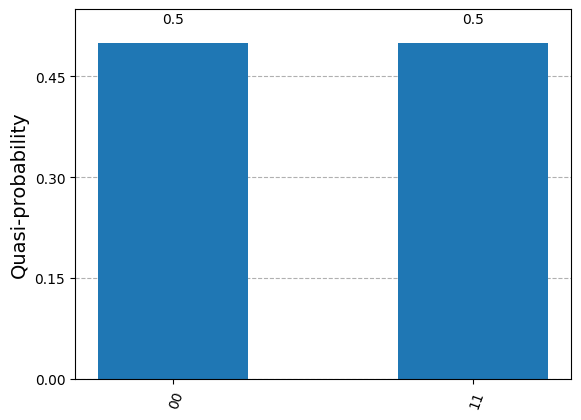

In [5]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram



sampler = Sampler()
results = sampler.run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))
# circuit.draw(output="mpl")

We will now use Estimator primitive for the same Bell state to find the average of qubit. The way the Estimator works is that, unlike samper that measures the qubit and finds the probability, an estimator computes the expecation values of observables. To find this, we use the Z basis measurement on both qubit 1 and 0 (independently and collectively). Since for this particular bell state phi+, the correlation is always 00 and 11 which means we can never have qubits correlated outside from this state. 

In [6]:
from qiskit import QuantumCircuit, QuantumRegister  
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator

# Create a Bell state circuit without measurement
qubits = QuantumRegister(2, name="q")
q0, q1 = qubits  
circuit = QuantumCircuit(qubits)
circuit.h(q0)  
circuit.cx(q0, q1)

# Define observables
Z0 = SparsePauliOp(["ZI"])  # Measure qubit 0 in Z basis
Z1 = SparsePauliOp(["IZ"])  # Measure qubit 1 in Z basis
ZZ = SparsePauliOp(["ZZ"])  # Measure both qubits in ZZ basis

# Initialize the estimator
estimator = Estimator()

# Running estimator for different observables
exp_val_Z0 = estimator.run([circuit], [Z0]).result().values[0]
exp_val_Z1 = estimator.run([circuit], [Z1]).result().values[0]
exp_val_ZZ = estimator.run([circuit], [ZZ]).result().values[0]  # Fix the brackets here

print(f"Expectation value of Z0: {exp_val_Z0}")
print(f"Expectation value of Z1: {exp_val_Z1}")
print(f"Expectation value of ZZ: {exp_val_ZZ}")


Expectation value of Z0: 0.0
Expectation value of Z1: 0.0
Expectation value of ZZ: 0.9999999999999998


GATES in Qiskit

In [7]:
#X - Gate flipping the qubit. The X gate is the equivalent of the classical NOT gate
from qiskit import QuantumCircuit
qc=QuantumCircuit(1)   #create a quantum circuit with one qubit, when we start with only one qubit we have qubit 0 by default. Hence we are flipping the qubit 0 here.
qc.x(0)   #Apply X gate to qubit 0
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

The following code doesn't show the flip in the qubit. It only shows the initial qubit and the Gate applied. To see the effect, we must measure the qubit and simulate the quantum circuit.

In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # ✅ Correct import

# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)
qc.x(0)  # Apply X (bit-flip) gate
qc.measure(0, 0)  # Measure the qubit

# Simulate the circuit
simulator = AerSimulator()  # ✅ Use AerSimulator directly
result = simulator.run(qc).result()

# Get and print the measurement result
counts = result.get_counts()
print(counts)  # Should print {'1': 1} since |0⟩ flips to |1⟩


{'1': 1024}


Creating a Bell State and figuring out which Bell state that is by storing them into the classical bits

In [9]:
#Creating a phi+ Bell state and measuring the Bell state to get the probability for eacch measurement 1024 times.

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)

qc.measure([0,1],[0,1])  #This measure the quantum states of both qubits and store them in the classical bits.
simulator=AerSimulator()

sampler=Sampler()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)  

#Since the output is {'11': 520, '00': 504} we measure the qubit 1024 times and we only get either 00 or 11 meaning the qubits are entangled as phi+



{'11': 527, '00': 497}


Creating a phi- Bell state from a phi+ Bell state. 
Once we have a phi+ Bell state, we can apply a Z flip in the first qubit in phi+ to get a local phase difference
Z∣0⟩ = ∣0⟩ and Z∣1⟩ = −∣1⟩. In other words, applying a phase flip for qubit 0 changes nothing while applying a phase flip on the qubit 1 flips the sign.

Differentiating a phi+ from phi- is quite tricky since they are only differ from the relative phase sign. Infact, we cannot measure the two qubits directly since the sign disappears as well.

Creating a phi - state from phi+. To creat a phi- state, we first create a phi+ state then we apply a Z flip

In [ ]:
#Creating a phi- state and measuring the qubit

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.z(0)   #Applying a Z gate to one of the qubits to create a phi- state from phi+ state
qc.measure([0,1],[0,1])
simulator=AerSimulator()

sampler=Sampler()
result=simulator.run(qc).result()
counts=result.get_counts()
print(counts)


{'00': 498, '11': 526}


Creating a psi+ state from phi+ state

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)

#Apply X gate to the first qubit to flip the qubit and creating a psi+ state from phi+ state
qc.x(0)
qc.measure([0,1],[0,1])
simulator=AerSimulator()

sampler=Sampler()
result=simulator.run(qc).result()
counts=result.get_counts()
print(counts)

#The probability is distributted equally since the probability for 01 and 10 in bell state is equal.

{'10': 487, '01': 537}


Creating a psi- state from phi+ state

In [18]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Apply X gate to transform |Φ+⟩ → |Ψ+⟩
qc.x(1)

# Apply Z gate to qubit 0 to introduce phase difference |Ψ+⟩ → |Ψ-⟩
qc.z(0)

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Simulate
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)


{'10': 493, '01': 531}
